In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Загрузите файл HR.csv в pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [ ]:
# Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# 50% квантиль - это медиана
print(f'Моды\n satisfaction_level: {df.satisfaction_level.mode()[0]}\n last_evaluation: {df.last_evaluation.mode()[0]}\n number_project: {df.number_project.mode()[0]}\n \
average_montly_hours: {df.average_montly_hours.mode()[0]}\n time_spend_company: {df.time_spend_company.mode()[0]}')

Моды
 satisfaction_level: 0.1
 last_evaluation: 0.55
 number_project: 4
 average_montly_hours: 135
 time_spend_company: 3


Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.
10
4 Рассчитайте сколько сотрудников работает в каждом
департаменте.
5
5 Показать распределение сотрудников по зарплатам. 5
6 Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности
5
7 Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом
10
8 Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

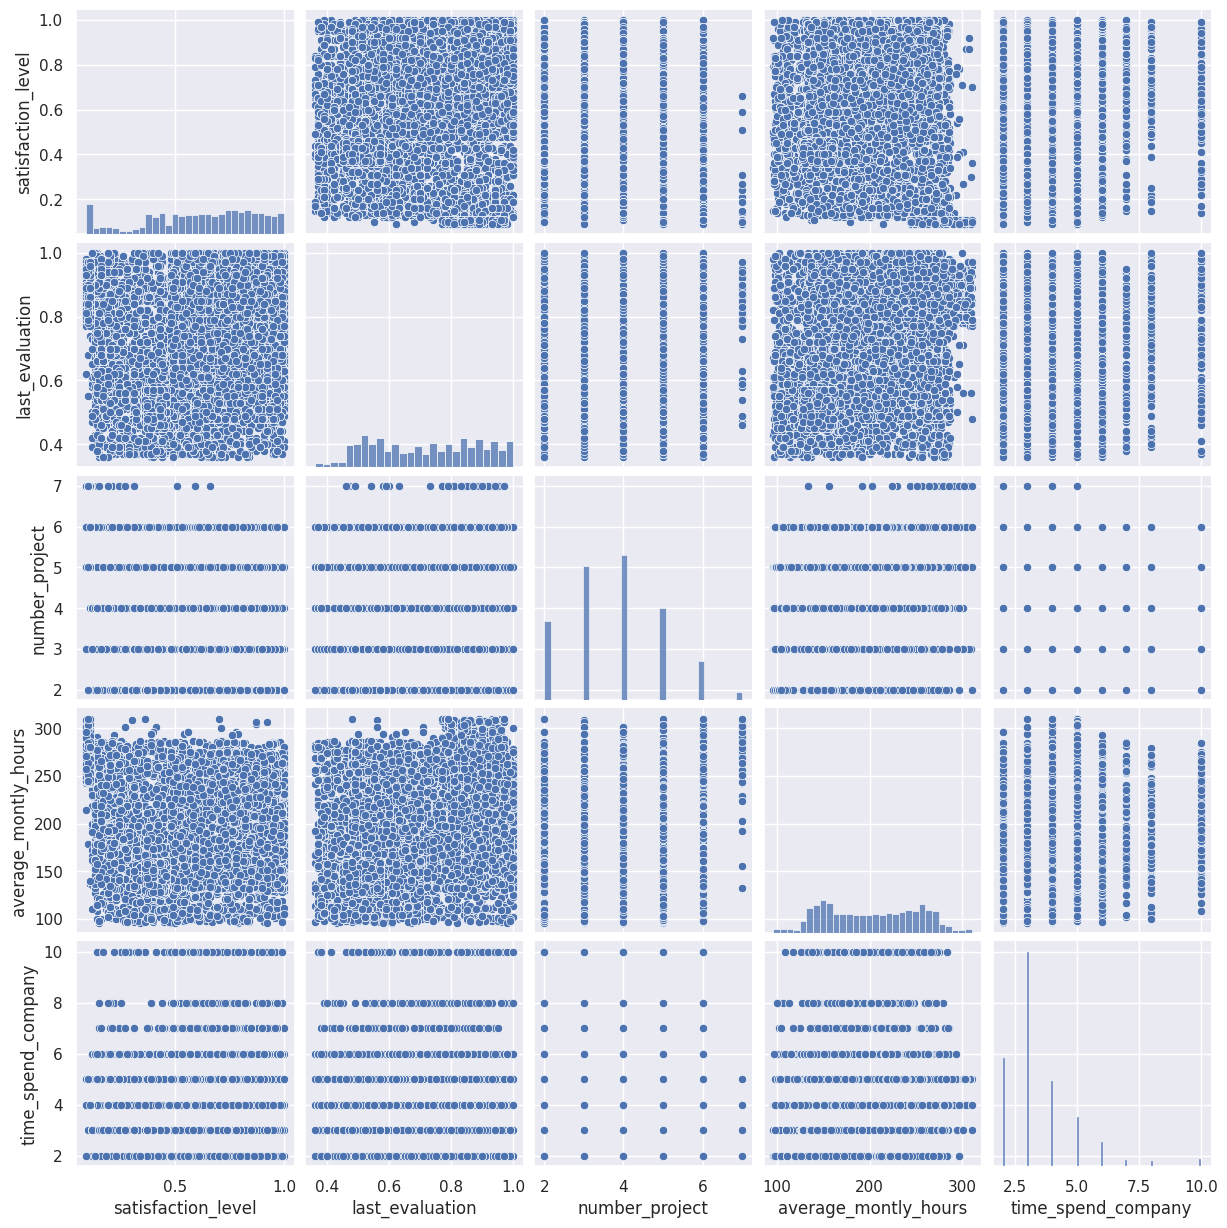

In [ ]:
sns.pairplot(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']])
#

<Axes: >

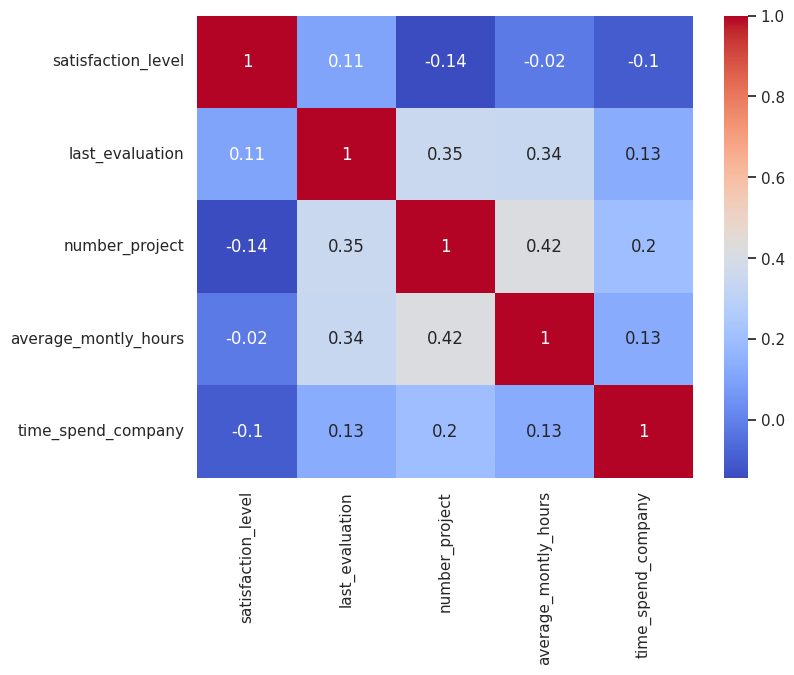

In [ ]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr(), annot=True, cmap='coolwarm')

In [ ]:
# Две самые скоррелированные величины: number_project и average_montly_hours
# Две наименее скоррелированные величины: satisfaction_level и average_montly_hours

In [ ]:
# Рассчитайте сколько сотрудников работает в каждом департаменте
df.groupby('department').agg({'satisfaction_level': 'count'}).sort_values('satisfaction_level', ascending = False)

,satisfaction_level
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [ ]:
# Показать распределение сотрудников по зарплатам
salary = df.groupby('salary')[['satisfaction_level']].count()\
    .sort_values('satisfaction_level', ascending=False)

salary.style.bar(align='mid', color='pink')


,satisfaction_level
salary,
low,7316
medium,6446
high,1237


<Axes: ylabel='department,salary'>

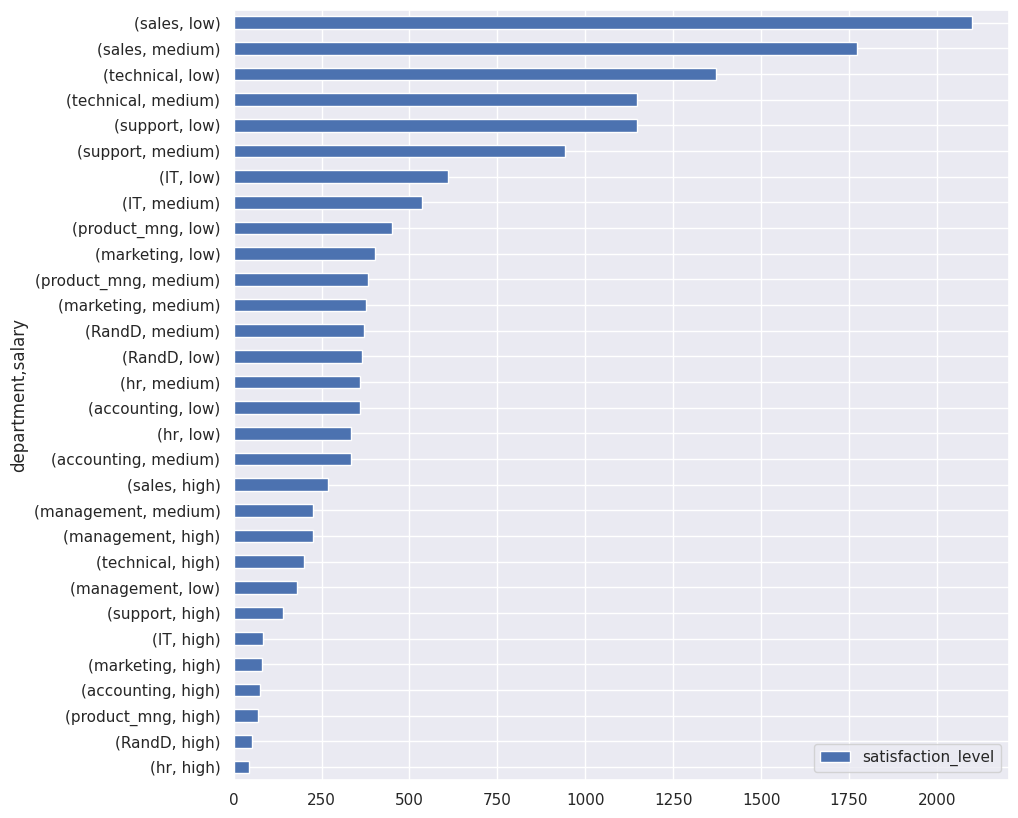

In [ ]:
# Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
df_ = df.groupby(['department', 'salary']).agg({'satisfaction_level': 'count'}).sort_values('satisfaction_level', ascending = True)
df_.plot(kind="barh",figsize=(10,10))

In [ ]:
# Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
import scipy.stats as stats
df_high = df[df['salary'] == 'high']
df_low = df[df['salary'] == 'low']
t, p = stats.ttest_ind(df_high['average_montly_hours'], df_low['average_montly_hours'])
print(t, p)
if p < 0.05:
  print("При уровне значимости 0.05 отклоняем нулевую гипотезу: сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом")
else:
  print("При уровне значимости 0.05 не отклоняем нулевую гипотезу: сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом")

-0.7288680398062308 0.4661023478267259
При уровне значимости 0.05 не отклоняем нулевую гипотезу: сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом


In [ ]:
# Рассчитать следующие показатели среди уволившихся и не
# уволившихся сотрудников (по отдельности)
# ● Доля сотрудников с повышением за последние 5 лет
# ● Средняя степень удовлетворенности
# ● Среднее количество проектов

print(f"Доля неуволившихся сотрудников с повышением {len(df[df['left'] == 0].loc[df['promotion_last_5years'] == 1]) / len(df[df['left'] == 0])}")
print(f"Доля уволившихся сотрудников с повышением {len(df[df['left'] == 1].loc[df['promotion_last_5years'] == 1]) / len(df[df['left'] == 1])}")


Доля неуволившихся сотрудников с повышением 0.026251312565628283
Доля уволившихся сотрудников с повышением 0.005320638476617194


In [ ]:
print(f"Средняя степень удовлетворенности неуволившихся сотрудников {df[df['left'] == 0]['satisfaction_level'].mean()}")
print(f"Средняя степень удовлетворенности уволившихся сотрудников {df[df['left'] == 1]['satisfaction_level'].mean()}")

Средняя степень удовлетворенности неуволившихся сотрудников 0.666809590479524
Средняя степень удовлетворенности уволившихся сотрудников 0.4400980117614114


In [ ]:
print(f"Среднее кол-во проектов неуволившихся сотрудников {df[df['left'] == 0]['number_project'].mean()}")
print(f"Среднее кол-во проектов уволившихся сотрудников {df[df['left'] == 1]['number_project'].mean()}")

Среднее кол-во проектов неуволившихся сотрудников 3.786664333216661
Среднее кол-во проектов уволившихся сотрудников 3.8555026603192384


In [ ]:
# Разделить данные на тестовую и обучающую выборки.
# Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
# Оценить качество модели на тестовой выборки

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

X = df[['satisfaction_level', 'last_evaluation', 'number_project',	'average_montly_hours', 'time_spend_company',	'Work_accident', 'promotion_last_5years']]
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
result = pd.DataFrame([np.array(y_test), lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,0,1
4,1,0
...,...,...
2995,0,0
2996,0,0
2997,0,0
2998,0,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))
# модель деет прогноз с точностью 76.3%

0.7633333333333333